In [80]:
import json
import os
import pandas as pd
import numpy as np
import json
import glob
from flask import jsonify


from scipy.spatial.distance import cdist
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import hierarchical, KMeans, MeanShift
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
%matplotlib inline


def plot_PCA(model, data):
    cluster_assign = model.predict(data)
    pca = PCA(2)
    plot_columns = pca.fit_transform(data)
    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=cluster_assign,)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Scatterplot of Canonical Variables for 3 Clusters')
    plt.show()
    
def plot_Trunc(model, data):
    cluster_assign = model.predict(data)
    pca_2 = TruncatedSVD(2)
    plot_columns = pca_2.fit_transform(data)
    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=cluster_assign,)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Scatterplot of Article Similarity')
    plt.show()
    return plot_columns
# THis has remoeved all the excess text processing by saving it to as csv. Much faster to load!

In [87]:
df = pd.read_csv(r'C:\Users\austi\Documents\data.csv')

# splits into 56, 24 
clus_train, clus_test = train_test_split(df, test_size=.3, random_state=22)


# In[26]:

clusters=range(1,20)
meandist=[]


#for k in clusters:
 #   model=KMeans(n_clusters=k)
#   model.fit(clus_train)
 #   clusassign=model.predict(clus_train)
#  meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
#    / clus_train.shape[0])

# This plots error as we increase clusters

# plt.plot(clusters, meandist)
# plt.xlabel('Number of clusters')
# plt.ylabel('Average distance')
# plt.title('Selecting k with the Elbow Method')




model3=KMeans(n_clusters=5)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)
clusassign

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

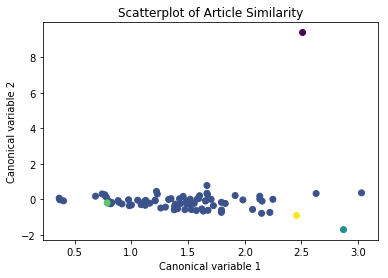

In [90]:
plot_columns = plot_Trunc(model3, df)


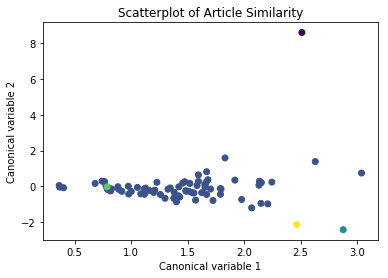

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [4]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]]
    0
0   1
1   1
2   1
3   1
4   1
5   1
6   1
7   1
8   1
9   1
10  1
11  1
12  1
13  1
14  1
15  1
16  1
17  1
18  1
19  1
20  1
21  2
22  1
23  1
24  1
25  1
26  1
27  1
28  1
29  1
.. ..
50  1
51  1
52  1
53  1
54  1
55  1
56  1
57  1
58  1
59  1
60  1
61  1
62  1
63  1
64  1
65  1
66  4
67  1
68  1
69  1
70  1
71  1
72  0
73  1
74  1
75  1
76  3
77  1
78  1
79  1

[80 rows x 1 columns]


In [94]:
# New graph with new data based on trained k-means. I'm cheating for now
# since im using training data in my test data because I want to test
# article mapping to coordinates


# This export data points and their associated cluster
def plot_columns_export(model, data):
    # export coordinates for each article
    plot_columns = plot_Trunc(model, data)
    #print(plot_columns)
    coordinates = pd.DataFrame.from_records(plot_columns)
    coordinates.to_csv('coordinates-scatterplot.csv', index=False)
    
    # export cluster numbers for graphing
    clusassign = model.predict(data)
    #print clusassign
    clusassign = clusassign.reshape((80,1))
    print(clusassign)
    clusassign = pd.DataFrame.from_records(clusassign)
    clusassign.to_csv('cluster-predictions.csv', index=False)
    print clusassign

plot_columns_export(model3, df)

In [50]:
# Creates number to url dictionary - this is just a test for now
number_to_urls = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

# Add url to each coordinate from number to urls dictionary
num_urls = len(plot_columns)
urls = np.arange(num_urls)
#print(urls)
url_coord = []
for i in range(num_urls):
    #plot_columns[i].('www.example.com')
    url_coord.append(np.insert(plot_columns[i], 0, i))
url_coord[0]


array([ 0.        ,  3.03638911,  0.33226068])

In [95]:
# Graph our word vectors by dimensionality reduction and using mpld3


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpld3
from mpld3 import plugins

# Define some CSS to control our custom labels
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""


fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

test_url= r'<a href="http://www.google.com/">example.com1<br>second line</a>'

labels = []
for i in range(4):
    #label = df.ix[[i], 1:3].T
    label = number_to_urls[i]
    #print(label)
    #label = ['Row {0}'.format(i)]
    #print(label)
    # .to_html() is unicode; so make leading 'u' go away with str()
    html = r'<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th>'+test_url+'</tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>'
    #html =r'<form method="get" action='+test_url+'><button type="submit">Go To Reserach Paper</button></form>'

    labels.append(html)
    print(html)
    
cluster_assign = model3.predict(df)
pca_2 = TruncatedSVD(2)
plot_columns = pca_2.fit_transform(df)
points = ax.plot(plot_columns[0:4,0], plot_columns[0:4, 1], 'o', color='g',
                 mec='k', ms=15, mew=1, alpha=.6)

#points = plt.subplot(x=plot_columns[:,0], y=plot_columns[:,1], c=cluster_assign,)

#points = ax.plot(plot_columns[0:4,0], plot_columns[:, 1], 'o', color='b', mec= 'k')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Article Clusters', size=20)

tooltip = plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)

mpld3.display()

<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">example.com1<br>second line</a></tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>
<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">example.com1<br>second line</a></tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>
<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">example.com1<br>second line</a></tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>
<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">example.com1<br>second line</a><